<a href="https://colab.research.google.com/github/keanfdes30/SHALA2020/blob/master/ML_L1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [ ]:
attrition_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

Therefore no null values in dataset 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadcc38bba8>,
      dtype=object)

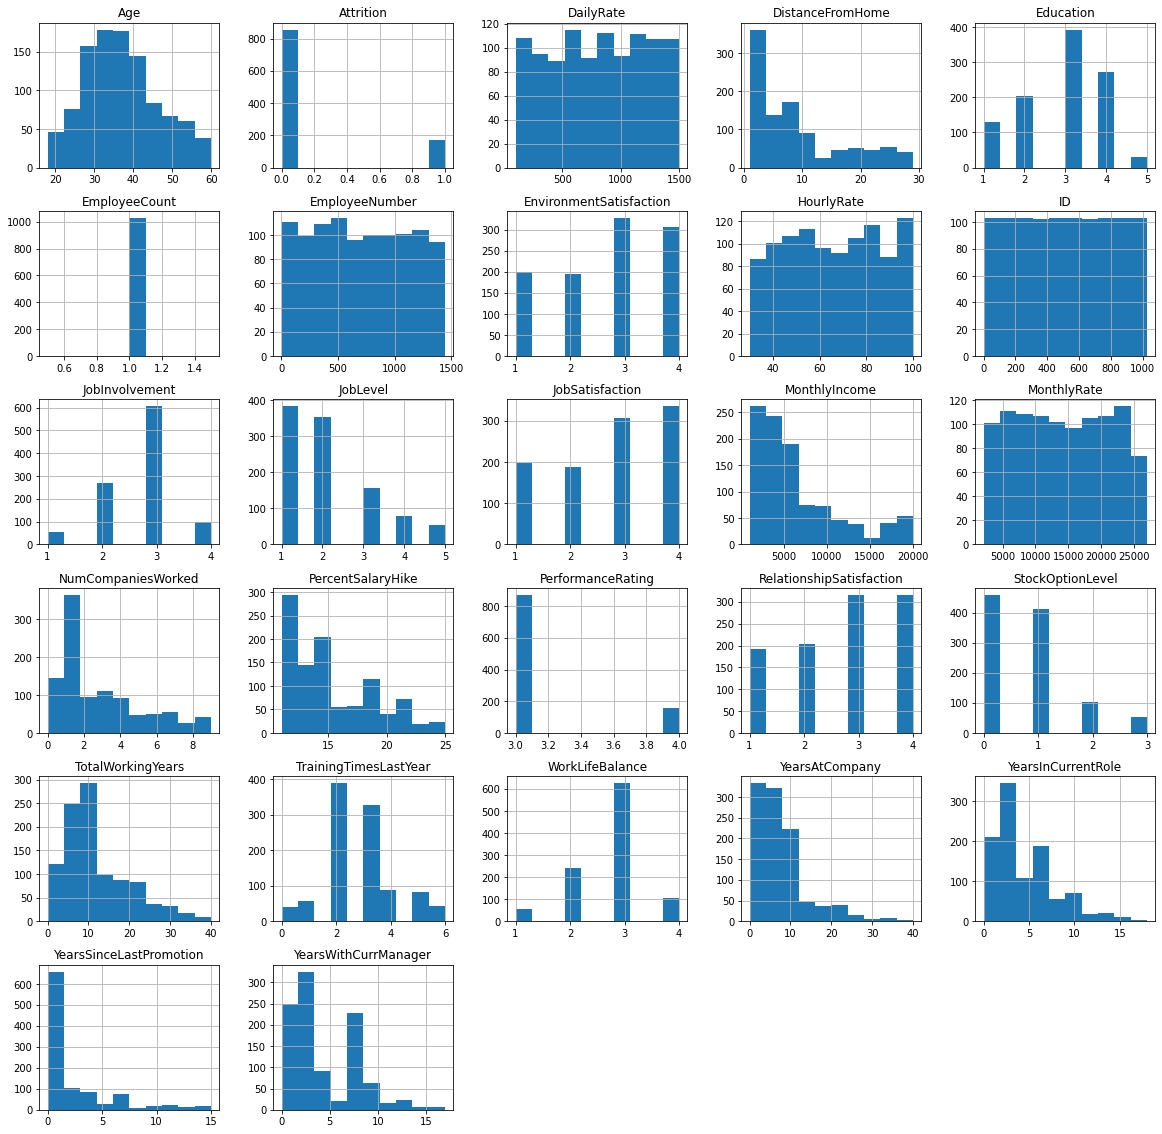

In [ ]:
attrition_data.hist(figsize=(20,20))

In [3]:
attrition_data = attrition_data.drop(['ID','EmployeeNumber','EmployeeCount'],axis = 1)

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [4]:
attrition_data_new = pd.get_dummies(attrition_data)
X = attrition_data_new.drop(['Attrition'],axis = 1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [5]:
y = attrition_data['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

### K Nearest Neighbors 

In [69]:
# standardisation for knn algo
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)
X.shape

(1028, 51)

In [70]:
# splitting train and test sets
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X, y, test_size = 0.2, random_state = 30)
print(X_train.shape)
print(X_test.shape)

(822, 51)
(206, 51)


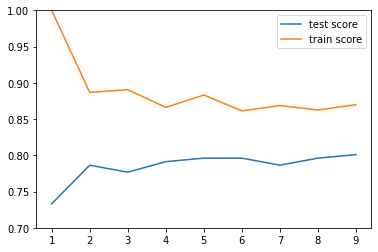

In [71]:
# using k nearest neighbors training algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
kvalues_train = []
kvalues_test = []
for k in range(1,10):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)
  yknn = knn.predict(X_test)
  kvalues_test.append(metrics.accuracy_score(yknn,y_test))
  kvalues_train.append(metrics.accuracy_score(knn.predict(X_train),y_train))
plt.plot(range(1,10),kvalues_test)
plt.plot(range(1,10),kvalues_train)
plt.ylim(0.7,1)
plt.legend(['test score','train score'])

In [72]:
# k value with max accuracy 
kvalues_test = np.array(kvalues_test)
print(f"max accuracy is {kvalues_test.max()} at k = {kvalues_test.argmax()+1}")

max accuracy is 0.8009708737864077 at k = 9


In [73]:
knn = KNeighborsClassifier(n_neighbors = kvalues_test.argmax()+1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

### Random Tree Forest

In [74]:
# normaliztion not required since this algorithm doesnt depend on distance
X = attrition_data_new.drop(['Attrition'],axis = 1)
X_train,X_test,y_train,y_test = tts(X, y, test_size = 0.2, random_state = 30)
X_train[0:5]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
554,27,975,7,3,4,55,2,2,1,6811,23398,8,19,3,1,0,9,2,1,7,6,0,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
881,32,1316,2,2,4,38,3,2,3,4998,2338,4,14,3,4,0,10,2,3,8,7,0,7,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
474,24,691,23,3,2,89,4,1,4,2725,21630,1,11,3,2,2,6,3,3,6,5,1,4,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
536,60,1179,16,4,1,84,3,2,1,5405,11924,8,14,3,4,0,10,1,3,2,2,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
514,33,1076,3,3,1,70,3,1,1,3348,3164,1,11,3,1,0,10,3,3,10,8,9,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1


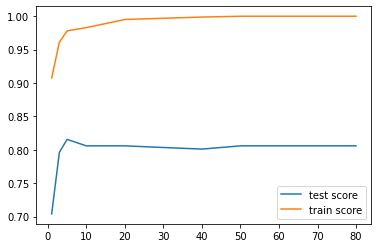

In [75]:
from sklearn.ensemble import RandomForestClassifier
trees = [1, 3, 5, 10, 20, 40, 50, 80]
tree_test = []
tree_train = []
for i in trees:
  rfc = RandomForestClassifier(n_estimators = i, criterion='entropy', random_state = 111)
  rfc.fit(X_train, y_train) 
  ytrees = rfc.predict(X_test)
  tree_test.append(metrics.accuracy_score(ytrees,y_test))
  tree_train.append(metrics.accuracy_score(rfc.predict(X_train),y_train))
plt.plot(trees,tree_test)
plt.plot(trees,tree_train)
plt.legend(['test score','train score'])

In [76]:
tree_test = np.array(tree_test)
print(f"max accuracy is {tree_test.max()} at k = {trees[tree_test.argmax()]}")

max accuracy is 0.8155339805825242 at k = 5


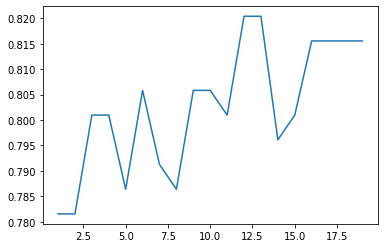

In [77]:
depth_arr = []
for j in range(1,20):
  rfc = RandomForestClassifier(n_estimators =  trees[tree_test.argmax()], criterion='entropy',max_depth=j, random_state = 111)
  rfc.fit(X_train, y_train) 
  ytrees = rfc.predict(X_test)
  depth_arr.append(metrics.accuracy_score(ytrees,y_test))
depth_arr = np.array(depth_arr)
plt.plot(range(1,20),depth_arr)

In [78]:
print(f"max accuracy is {depth_arr.max()} at depth = {depth_arr.argmax() + 1}")

max accuracy is 0.8203883495145631 at depth = 12


In [94]:
rfc = RandomForestClassifier(n_estimators = trees[tree_test.argmax()], criterion='entropy',max_depth=depth_arr.argmax() + 1, random_state = 111)
rfc.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lregr_acc = []

for i in np.arange(0.1,0.2,0.01):
  regr = LogisticRegression(C=i,solver = 'newton-cg',max_iter=1000,tol=0.1)
  regr.fit(X_train,y_train)
  ylregr = regr.predict(X_test)
lregr_acc.append(metrics.accuracy_score(ylregr,y_test))
lregr_acc = np.array(lregr_acc)

In [81]:
print(f"max of {lregr_acc.max()} at {0.1+(0.01*(lregr_acc.argmax()+1))}")

max of 0.8446601941747572 at 0.11


In [82]:
temp = 0.1+(0.01*(lregr_acc.argmax()+1))
regr = LogisticRegression(C=temp,solver = 'newton-cg',max_iter=1000,tol=0.2)
regr.fit(X_train,y_train)

LogisticRegression(C=0.11, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.2, verbose=0,
                   warm_start=False)

### AdaBoost Classifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
check = []
for i in range(1,200):
  clf = AdaBoostClassifier(n_estimators=i)
  clf.fit(X_train,y_train)
  check.append(metrics.accuracy_score(clf.predict(X_test),y_test))
check =np.array(check)  
print(check.max())

0.8349514563106796


In [85]:
print(check.argmax()+1)
clf = AdaBoostClassifier(n_estimators=check.argmax()+1)
clf.fit(X_train,y_train)

33


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=33, random_state=None)

### Performance analysis of different trained models

In [95]:
print(y_test.value_counts())
print(metrics.confusion_matrix(y_test,y_test))
print(f"knn:{metrics.accuracy_score(knn.predict(X_test),y_test)}\n {metrics.confusion_matrix(knn.predict(X_test),y_test)}")
print(f"rfc:{metrics.accuracy_score(rfc.predict(X_test),y_test)}\n {metrics.confusion_matrix(rfc.predict(X_test),y_test)}")
print(f"logistic:{metrics.accuracy_score(regr.predict(X_test),y_test)}\n {metrics.confusion_matrix(regr.predict(X_test),y_test)}")
print(f"adaboost:{metrics.accuracy_score(clf.predict(X_test),y_test)}\n {metrics.confusion_matrix(clf.predict(X_test),y_test)}")

0    161
1     45
Name: Attrition, dtype: int64
[[161   0]
 [  0  45]]
knn:0.7815533980582524
 [[161  45]
 [  0   0]]
rfc:0.8203883495145631
 [[157  33]
 [  4  12]]
logistic:0.8446601941747572
 [[156  27]
 [  5  18]]
adaboost:0.8349514563106796
 [[155  28]
 [  6  17]]


In [96]:
from sklearn.metrics import classification_report
print(f"knn:\n{classification_report(knn.predict(X_test),y_test)}")
print(f"rfc:\n{classification_report(rfc.predict(X_test),y_test)}")
print(f"logistic:\n{classification_report(regr.predict(X_test),y_test)}")
print(f"adaboost:\n{classification_report(clf.predict(X_test),y_test)}")

knn:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88       206
           1       0.00      0.00      0.00         0

    accuracy                           0.78       206
   macro avg       0.50      0.39      0.44       206
weighted avg       1.00      0.78      0.88       206

rfc:
              precision    recall  f1-score   support

           0       0.98      0.83      0.89       190
           1       0.27      0.75      0.39        16

    accuracy                           0.82       206
   macro avg       0.62      0.79      0.64       206
weighted avg       0.92      0.82      0.86       206

logistic:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       183
           1       0.40      0.78      0.53        23

    accuracy                           0.84       206
   macro avg       0.68      0.82      0.72       206
weighted avg       0.91      0.84      0.86       206


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier(estimators=[('lr', regr), ('rf', rfc)],voting='soft')
eclf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.11, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='newton-cg', tol=0.2,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                          

In [104]:
print(metrics.accuracy_score(eclf.predict(X_test),y_test))
print(metrics.confusion_matrix(eclf.predict(X_test),y_test))
print(classification_report(eclf.predict(X_test),y_test))

0.8446601941747572
[[158  29]
 [  3  16]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91       187
           1       0.36      0.84      0.50        19

    accuracy                           0.84       206
   macro avg       0.67      0.84      0.70       206
weighted avg       0.92      0.84      0.87       206



Therefore logistic regression gives the highest accuracy. In general the accuracy for all methods w.r.t attrition value of 1 is bad due to low sample size and biased towards 0

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  